Importamos las librerías necesarias.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creamos una clase `Interruptor` que tiene como métodos `verificar_vida`, `aplicar_dano`, `cant_fallos`, entre otras.

In [48]:
class Interruptor:
    def __init__(self):
        self.dano = np.zeros(5) 
        self.dano_historial = []

    def verificar_vida(self):
        return not all(self.dano > 100)

    def aplicar_dano(self, retornar = False):
        if not self.verificar_vida():
            print("Todas las componentes están muertas. No se puede aplicar más daño.")
            return None
        
        alpha = np.random.uniform(0.75, 1.5)
        beta  = np.random.uniform(2.75, 3.25)
        dano  = 10 * np.random.beta(alpha, beta)
        self.dano_historial.append(dano)
        
        comp_danables  = np.where(self.dano < 100)[0]  # índices
        n_comp_a_danar = np.random.randint(1, len(comp_danables)+1)
        
        comp_a_danar = np.argsort(self.dano[comp_danables])[:n_comp_a_danar]
        
        self.dano[comp_danables[comp_a_danar]] += dano/n_comp_a_danar
        
        if any(self.dano > 100):
            print(f'Hay {len(np.where(self.dano > 100)[0])} componente(s) muerta(s).')
        
        return self.dano_historial if retornar else None 
        
    def mostrar_dano(self):
        print(f'Daño actual a las componentes: {self.dano}')
        
    def mostrar_vida(self):
        print(f'Vida actual de las componentes: {100-self.dano}')
        
    def cant_fallos(self):
        (
            print(f'El equipo lleva {len(self.dano_historial)} fallos, continua operativo.')
            if self.verificar_vida() else 
            print(f'El equipo soportó {len(self.dano_historial)} fallos, se encuentra inoperativo.') 
        )

In [55]:
interruptor = Interruptor()

interruptor.mostrar_vida()

Vida actual de las componentes: [100. 100. 100. 100. 100.]


In [56]:
interruptor.verificar_vida()

True

In [57]:
interruptor.cant_fallos()

El equipo lleva 0 fallos, continua operativo.


In [61]:
while interruptor.verificar_vida():
    interruptor.aplicar_dano()
interruptor.cant_fallos()
interruptor.mostrar_dano()
interruptor.mostrar_vida()

Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 3 componente(s) muerta(s).
Hay 5 componente(s) muerta(s).
El equipo soportó 193 fallos, se encuentra inoperativo.
Daño actual a las componentes: [102.40846064 102.42496351 100.07394649 100.54323761 100.87429442]
Vida actual de las componentes: [-2.40846064 -2.42496351 -0.07394649 -0.54323761 -0.87429442]


In [62]:
interruptor.aplicar_dano()

Todas las componentes están muertas. No se puede aplicar más daño.


In [63]:
interruptor.dano_historial

[0.46579579016357786,
 3.778946595746013,
 1.978328353670633,
 1.8575116596003611,
 4.0267008095926915,
 0.561493567180104,
 2.9421450050580074,
 3.2401200362121663,
 6.561621721098678,
 0.606271051321406,
 0.4635251181808581,
 3.71340315350615,
 4.923782717731563,
 0.11532178061438347,
 4.377446491360749,
 1.6280012395902403,
 5.116933691559213,
 6.213053163831135,
 0.0774200743934154,
 0.13702581811975212,
 5.028148972727017,
 2.2625569266972763,
 3.205604925266286,
 2.1901894266603548,
 0.40820835096896857,
 1.5424239417661783,
 6.103198281662988,
 7.1217808642822025,
 3.1118162473242563,
 7.100020108231474,
 1.4468002494262415,
 4.600556174747919,
 5.124884089526692,
 0.8276364672722448,
 1.9846324960313209,
 1.9910583574390288,
 4.094934667371379,
 2.663496800806432,
 2.522885618328474,
 2.73689555043533,
 0.4839437557618825,
 3.8756912313881324,
 0.286070324645358,
 3.1718938821110747,
 4.389113565457846,
 0.6393899007710098,
 3.508031709630046,
 0.9033387361562594,
 3.7095580730

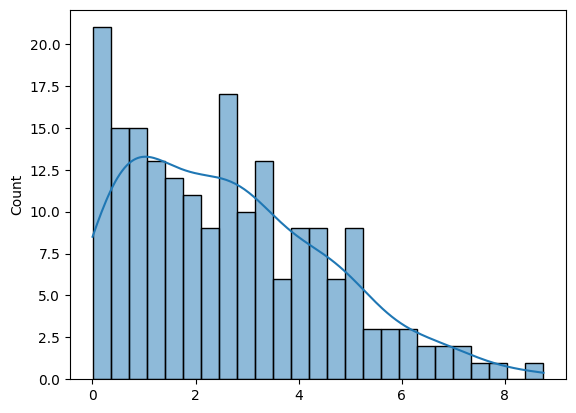

In [64]:
sns.histplot(interruptor.dano_historial, kde=True, bins=25);

In [66]:
Interruptor().aplicar_dano(True)[0]

0.14898803098269497

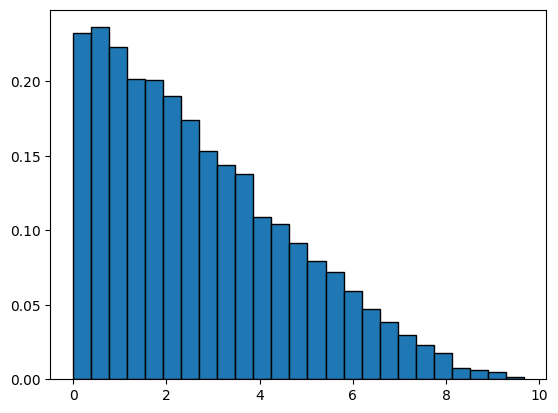

In [73]:
plt.hist([Interruptor().aplicar_dano(True)[0] for _ in range(10_000)], edgecolor='k', bins=25, density=True);